In [230]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [240]:
tree = pd.read_csv('./little_data/DEGs_sim_mtx_top20.csv',index_col=0)
try:
    tree = tree.loc[tree.index.drop('ctrl'),tree.columns.drop('ctrl')]
except:
    pass
np.fill_diagonal(tree.values, 0)

In [241]:
tree.max().max()

16

In [242]:
react = pd.read_csv('./little_data/reactome_distance_mtx_inDisease.csv',index_col=0)
np.fill_diagonal(react.values, 0)
react = react.loc[tree.index, tree.columns]

In [243]:
tree.shape, react.shape

((105, 105), (105, 105))

In [244]:
(tree>6).sum().sum()

254

In [245]:
tree[tree<=6] = 0

In [246]:
#(react>1).sum().sum()
#react[react<2] = 0

In [247]:
overlap = ((tree != 0) & (react != 0)).sum().sum()
overlap

14

In [248]:
(tree != 0).sum().sum(), (react != 0).sum().sum()

(254, 100)

### Permutation test

In [249]:
n_perm = 10000
null_hyp = 0
null_recs = []
for i in range(n_perm):
    shuffled_tree = shuffle(tree,random_state=i)
    t = tree.values.copy()
    np.random.shuffle(t)
    t = t.T
    np.random.shuffle(t)
    t = t.T
    sim = ((t != 0) & (react.values != 0)).sum().sum()
    if sim >= overlap:
        null_hyp += 1
    null_recs.append(sim)
p_value = (null_hyp+1)/(n_perm+1)
print(f"p_value={p_value}")

p_value=9.999000099990002e-05


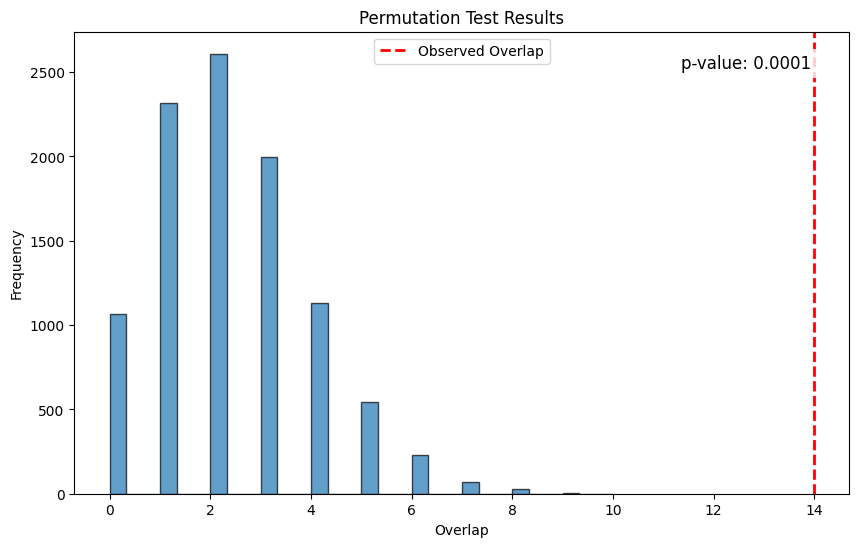

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming we have the following variables defined:
# overlap: The observed overlap between the two datasets
# null_recs: List of simulated overlaps under the null hypothesis
# p_value: The calculated p-value from the permutation test

# Convert null_recs to a numpy array
null_recs = np.array(null_recs)

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(null_recs, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(overlap, color='red', linestyle='dashed', linewidth=2, label='Observed Overlap')

# Add labels and title
plt.xlabel('Overlap')
plt.ylabel('Frequency')
plt.title('Permutation Test Results')

# Add text for p-value
plt.text(0.95, 0.95, f'p-value: {p_value:.4f}', 
         horizontalalignment='right', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Add legend
plt.legend()

# Show the plot
plt.show()